<a href="https://colab.research.google.com/github/BharathwajMuthyampally/ICP-1/blob/main/700754822_MiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)


100%|██████████| 26.4M/26.4M [00:01<00:00, 14.7MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 309kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 5.56MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 13.6MB/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Hyperparameters
BATCH_SIZE = 64
LEARNING_RATE = 0.001
NUM_EPOCHS = 5
SECRET_KEY = 1  # This is the "HPNN Key" used to lock the model

# Define a neural network with locking mechanism
class LockedNeuralNetwork(nn.Module):
    def __init__(self, key):
        super(LockedNeuralNetwork, self).__init__()
        self.key = key  # Secret key for obfuscation
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the input
        x = torch.relu(self.fc1(x) * self.key)  # Apply key to activation
        x = torch.relu(self.fc2(x) * self.key)
        x = self.fc3(x)
        return x

# Load Fashion-MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.FashionMNIST(root='./data', train=False, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Initialize the model, loss function, and optimizer
model = LockedNeuralNetwork(SECRET_KEY)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

# Training loop with obfuscation (using the key)
def train(model, data_loader, criterion, optimizer):
    model.train()
    for epoch in range(NUM_EPOCHS):
        total_loss = 0
        for inputs, labels in data_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            # Obfuscate weights during update based on the key
            for param in model.parameters():
                param.data -= model.key * LEARNING_RATE * param.grad.data
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}/{NUM_EPOCHS}, Loss: {total_loss/len(data_loader)}")

# Evaluation function
def evaluate(model, data_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in data_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f"Accuracy: {accuracy:.2f}%")

# Train and evaluate the obfuscated model
print("Training the locked model...")
train(model, train_loader, criterion, optimizer)

print("\nEvaluating the locked model on test data...")
evaluate(model, test_loader)

# Simulate unauthorized usage by changing the key and re-evaluating
model.key = 0  # Unauthorized usage without the correct key
print("\nEvaluating model without correct key (simulating unauthorized usage)...")
evaluate(model, test_loader)


Training the locked model...
Epoch 1/5, Loss: 0.5584653583861617
Epoch 2/5, Loss: 0.39695494811831
Epoch 3/5, Loss: 0.356871664937117
Epoch 4/5, Loss: 0.32991670110205346
Epoch 5/5, Loss: 0.3108079794849922

Evaluating the locked model on test data...
Accuracy: 87.17%

Evaluating model without correct key (simulating unauthorized usage)...
Accuracy: 10.00%


PixEnhance: Deep Learning for Image Super-Resolution and Enhancement using Secure Key

Training the locked model...
Epoch 1/5, Loss: 0.0003700765469540784
Epoch 2/5, Loss: 1.250091054468309e-05
Epoch 3/5, Loss: 7.856875101909584e-06
Epoch 4/5, Loss: 5.559343599785885e-06
Epoch 5/5, Loss: 4.492227906484914e-06

Evaluating the locked model with the correct key...


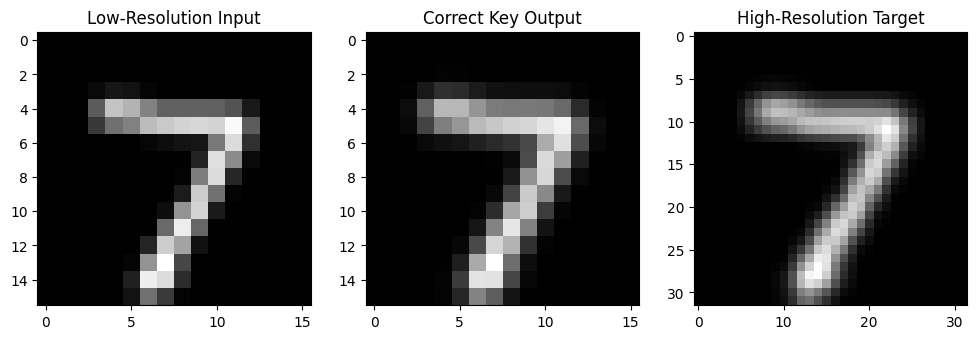


Evaluating model without the correct key (simulating unauthorized usage)...
Incorrect key provided. Unable to display results.


In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Hyperparameters
BATCH_SIZE = 16
LEARNING_RATE = 0.001
NUM_EPOCHS = 5
SECRET_KEY = 3  # This is the correct key to unlock the model

# Define a CNN model for super-resolution with a locking mechanism
class PixEnhanceModel(nn.Module):
    def __init__(self, key):
        super(PixEnhanceModel, self).__init__()
        self.key = key  # Secret key for obfuscation
        self.correct_key = SECRET_KEY  # Store the correct key for verification
        self.conv1 = nn.Conv2d(1, 64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(64, 32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(32, 1, kernel_size=3, padding=1)

    def forward(self, x):
        # Apply secret key to both weights and activations for each layer
        x = torch.relu(self.conv1(x) * self.key)
        x = torch.relu(self.conv2(x * self.key))
        x = torch.sigmoid(self.conv3(x * self.key))
        return x

    def is_key_correct(self):
        # Check if the provided key matches the correct key
        return self.key == self.correct_key

# Load and preprocess the dataset (using MNIST as an example for simplicity)
transform = transforms.Compose([
    transforms.Resize((16, 16)),  # Lower resolution
    transforms.ToTensor()
])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# Initialize the model, loss function, and optimizer
model = PixEnhanceModel(SECRET_KEY)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

# Training loop with obfuscation (using the key)
def train(model, data_loader, criterion, optimizer):
    model.train()
    for epoch in range(NUM_EPOCHS):
        total_loss = 0
        for inputs, _ in data_loader:
            # Resize low-res input and target to the same scale
            inputs = inputs
            target = torch.nn.functional.interpolate(inputs, scale_factor=2, mode='bilinear', align_corners=False)

            # Downscale the target back to 16x16 for matching model output size
            target = torch.nn.functional.interpolate(target, scale_factor=0.5, mode='bilinear', align_corners=False)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, target)
            loss.backward()
            for param in model.parameters():
                # Obfuscate weights directly based on the key to enhance dependency
                param.data -= model.key * LEARNING_RATE * param.grad.data
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}/{NUM_EPOCHS}, Loss: {total_loss/len(data_loader)}")

# Evaluation function with key check to control output display
def evaluate(model, data_loader, title="Evaluation"):
    if not model.is_key_correct():
        print("Incorrect key provided. Unable to display results.")
        return  # Skip the display if the key is incorrect

    model.eval()
    inputs, _ = next(iter(data_loader))
    inputs = inputs
    target = torch.nn.functional.interpolate(inputs, scale_factor=2, mode='bilinear', align_corners=False)

    with torch.no_grad():
        outputs = model(inputs)

    # Plot results
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))
    axs[0].imshow(inputs[0][0].cpu(), cmap='gray')
    axs[0].set_title("Low-Resolution Input")
    axs[1].imshow(outputs[0][0].cpu(), cmap='gray')
    axs[1].set_title(f"{title} Output")
    axs[2].imshow(target[0][0].cpu(), cmap='gray')
    axs[2].set_title("High-Resolution Target")
    plt.show()

# Train the model
print("Training the locked model...")
train(model, train_loader, criterion, optimizer)

# Evaluate with the correct key
print("\nEvaluating the locked model with the correct key...")
evaluate(model, test_loader, title="Correct Key")

# Simulate unauthorized usage by changing the key and re-evaluating
model.key = 0  # Unauthorized usage without the correct key
print("\nEvaluating model without the correct key (simulating unauthorized usage)...")
evaluate(model, test_loader, title="Incorrect Key")
